<a href="https://colab.research.google.com/github/dapariciom/BEDU-procesamiento-de-datos-con-python-proyecto/blob/main/Proyecto_Vacunas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Comandos de Github

## Clonar el repositorio de Github a Colab

(Hacer solo una vez)
- Conectar Colab con Google Drive
- Crear una carpeta "Proyecto" en Google Drive "/content/drive/MyDrive/Proyecto"
- Cambiar la ruta a la carpeta Proyecto

In [ ]:
cd '/content/drive/MyDrive/Proyecto'

*     Clonar el repositorio en la carpeta Proyecto

In [ ]:
!git clone https://github.com/dapariciom/BEDU-procesamiento-de-datos-con-python-proyecto.git

## Actualizar cambios de Github a Colab

(Hacer cada vez que se requiera actualiza Colab con Github)
* Cambiar la ruta del proyecto para actualizar todos los archivos




In [ ]:
cd '/content/drive/MyDrive/Proyecto/BEDU-procesamiento-de-datos-con-python-proyecto'

* Actualizar archivos del repositorio de Github

In [ ]:
!git pull

# Proyecto Vacunación - 



**[ T R A D U C I R ]**


**COVID-19 World Vaccination Progress**

**Daily and Total Vaccination for COVID-19 in the World**


Basic features of the data set
The data contains the following information
* Country- this is the country for which the vaccination information is provided;
* Country ISO Code - ISO code for the country;
* Date - date for the data entry; for some of the dates we have only the daily * vaccinations, for others, only the (cumulative) total;
* Total number of vaccinations - this is the absolute number of total immunizations in the country;
* Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
* Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
* Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
* Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
* Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
* Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
* Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
* Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
* Vaccines used in the country - total number of vaccines used in the country (up to date);
* Source name - source of the information (national authority, international organization, local organization etc.);
* Source website - website of the source of information;

Instalar librerias

In [ ]:
pip install missingpy

Importar librerias

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from missingpy import  KNNImputer

Lectura de datos

In [60]:
csv_file = 'country_vaccinations.csv'
df = pd.read_csv(f'/content/drive/MyDrive/Proyecto/BEDU-procesamiento-de-datos-con-python-proyecto/{csv_file}', engine='python')
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,Zimbabwe,ZWE,2021-03-02,25077.0,25077.0,NaN,3621.0,3005.0,0.17,0.17,NaN,202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1368309157...
5317,Zimbabwe,ZWE,2021-03-03,27970.0,27970.0,NaN,2893.0,2871.0,0.19,0.19,NaN,193.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1368309157...
5318,Zimbabwe,ZWE,2021-03-04,30658.0,30658.0,NaN,2688.0,2807.0,0.21,0.21,NaN,189.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1368309157...
5319,Zimbabwe,ZWE,2021-03-05,31325.0,31325.0,NaN,667.0,2678.0,0.21,0.21,NaN,180.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1368309157...


Explorar DataFrame

In [61]:
df.isna().sum(axis=0)

country                                   0
iso_code                                332
date                                      0
total_vaccinations                     1937
people_vaccinated                      2331
people_fully_vaccinated                3282
daily_vaccinations_raw                 2476
daily_vaccinations                      184
total_vaccinations_per_hundred         1937
people_vaccinated_per_hundred          2331
people_fully_vaccinated_per_hundred    3282
daily_vaccinations_per_million          184
vaccines                                  0
source_name                               6
source_website                            0
dtype: int64

In [62]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

Limpieza de datos


In [66]:
df_vaccinations = df.drop(columns= ["iso_code","source_name","source_website"])
df_vaccinations = df_column_dropped.dropna(subset=["total_vaccinations",
                               "people_vaccinated",
                               "people_fully_vaccinated",
                               "daily_vaccinations_raw",
                               "daily_vaccinations",
                               "total_vaccinations_per_hundred",
                               "people_vaccinated_per_hundred",
                               "people_fully_vaccinated_per_hundred",
                               "daily_vaccinations_per_million"],thresh=5)

In [ ]:
df_vaccinations["date"] = pd.to_datetime(df_vaccinations["date"], format = '%Y-%m-%d')

Procedimiento

* ¿Cuál es el porcentaje total de personas vacunadas en el mundo?



In [97]:
world_population = 785156800
world_people_fully_vaccinated = df_vaccinations.groupby('country')['people_fully_vaccinated'].max().sum()

print(f'En el mundo se han vacunado completamente {round(world_people_fully_vaccinated):,} personas lo que equivale al {round(world_people_fully_vaccinated*100/world_population, 2)} % de la población mundial')

En el mundo se han vacunado completamente 66,694,460 personas lo que equivale al 8.49 % de la población mundial


* Cociente de personas vacunadas / personas completamente vacunadas

In [69]:
world_people_vaccinated = df_vaccinations.groupby('country')['people_vaccinated'].max().sum()
ratio = round(world_people_vaccinated/world_people_fully_vaccinated, 2)
print(f'El cociente de personas vacunadas / personas completamente vacunadas es {ratio}')
print(f'Lo que quiere decir que por cada {ratio} personas que han recibido al menos una vacuna existe 1 persona completamente vacunada')

El cociente de personas vacunadas / personas completamente vacunadas es 2.99
Lo que quiere decir que por cada 2.99 personas que han recibido al menos una vacuna existe 1 persona completamente vacunada


* Top 10 de países que presentaron la mayor vacunacion por día

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


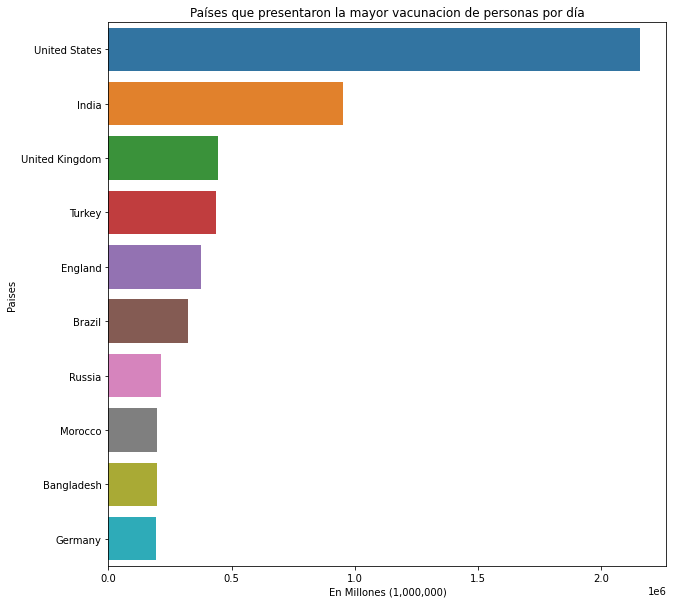

In [96]:
top_10_daily_vaccinations = df_vaccinations.groupby('country')['daily_vaccinations'].max().sort_values(ascending=False).head(10)

def daily_vaccinations_plot_bars(value):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Países que presentaron la mayor vacunacion de personas por día')
    sns.barplot(value, value.index, ax=ax)
    ax.set(ylabel='Paises', xlabel='En Millones (1,000,000)')

daily_vaccinations_plot_bars(top_10_daily_vaccinations)



PARA MÉXICO

In [ ]:
#FILTRAMOS DATOS DE MEXICO
df_mexico = df[df["country"] == "Mexico"]
df_mexico

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3237,Mexico,MEX,2020-12-24,2924.0,2924.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3238,Mexico,MEX,2020-12-25,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3239,Mexico,MEX,2020-12-26,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3240,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3241,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,Mexico,MEX,2021-03-02,2583435.0,2012853.0,570582.0,56572.0,111754.0,2.00,1.56,0.44,867.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3306,Mexico,MEX,2021-03-03,2633580.0,2043941.0,589639.0,50145.0,104685.0,2.04,1.59,0.46,812.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3307,Mexico,MEX,2021-03-04,2676035.0,NaN,NaN,42455.0,83889.0,2.08,NaN,NaN,651.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3308,Mexico,MEX,2021-03-05,2731900.0,2128766.0,603134.0,55865.0,65838.0,2.12,1.65,0.47,511.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...


In [ ]:
df_mexico.isna().sum(axis=0)

country                                 0
iso_code                                0
date                                    0
total_vaccinations                      7
people_vaccinated                       9
people_fully_vaccinated                25
daily_vaccinations_raw                 11
daily_vaccinations                      1
total_vaccinations_per_hundred          7
people_vaccinated_per_hundred           9
people_fully_vaccinated_per_hundred    25
daily_vaccinations_per_million          1
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

In [ ]:
#ELIMINAMOS FILAS QUE TENGAN MAS DE 5 NaNs
df_mexico_filtraNaNs=df_mexico.dropna(subset=["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"],thresh=5)
df_mexico_filtraNaNs


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3240,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3241,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3242,Mexico,MEX,2020-12-29,18529.0,18529.0,NaN,8950.0,3121.0,0.01,0.01,NaN,24.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3243,Mexico,MEX,2020-12-30,24998.0,24998.0,NaN,6469.0,3679.0,0.02,0.02,NaN,29.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3248,Mexico,MEX,2021-01-04,43960.0,43960.0,NaN,NaN,4912.0,0.03,0.03,NaN,38.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,Mexico,MEX,2021-03-02,2583435.0,2012853.0,570582.0,56572.0,111754.0,2.00,1.56,0.44,867.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3306,Mexico,MEX,2021-03-03,2633580.0,2043941.0,589639.0,50145.0,104685.0,2.04,1.59,0.46,812.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3307,Mexico,MEX,2021-03-04,2676035.0,NaN,NaN,42455.0,83889.0,2.08,NaN,NaN,651.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3308,Mexico,MEX,2021-03-05,2731900.0,2128766.0,603134.0,55865.0,65838.0,2.12,1.65,0.47,511.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...


In [ ]:
dfNA= df_mexico_filtraNaNs[["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"]]

In [ ]:
imp = KNNImputer(n_neighbors=4,weights="uniform")
X=imp.fit_transform(dfNA)

/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)


In [ ]:
df_mexico_filtraNaNs[["total_vaccinations","people_vaccinated",
"people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"]] = X

In [ ]:
df_mexico_filtraNaNs

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3240,Mexico,MEX,2020-12-27,6824.0,6824.0,3539.75,5612.50,1300.0,0.01,0.01,0.0025,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3241,Mexico,MEX,2020-12-28,9579.0,9579.0,3539.75,2755.00,1664.0,0.01,0.01,0.0025,13.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3242,Mexico,MEX,2020-12-29,18529.0,18529.0,3539.75,8950.00,3121.0,0.01,0.01,0.0025,24.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3243,Mexico,MEX,2020-12-30,24998.0,24998.0,3539.75,6469.00,3679.0,0.02,0.02,0.0025,29.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3248,Mexico,MEX,2021-01-04,43960.0,43960.0,3539.75,5227.75,4912.0,0.03,0.03,0.0025,38.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,Mexico,MEX,2021-03-02,2583435.0,2012853.0,570582.00,56572.00,111754.0,2.00,1.56,0.4400,867.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3306,Mexico,MEX,2021-03-03,2633580.0,2043941.0,589639.00,50145.00,104685.0,2.04,1.59,0.4600,812.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3307,Mexico,MEX,2021-03-04,2676035.0,2086979.5,591700.50,42455.00,83889.0,2.08,1.62,0.4600,651.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3308,Mexico,MEX,2021-03-05,2731900.0,2128766.0,603134.00,55865.00,65838.0,2.12,1.65,0.4700,511.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...


In [ ]:
df_mexico_filtraNaNs.isna().sum(axis=0)

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64